# Loading

In [ ]:
!pip install scikit-learn pandas numpy shap fairlearn lime xgboost

In [ ]:
!pip install --upgrade scikit-learn xgboost

In [ ]:
!wget https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv -P /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

--2025-03-12 16:55:10--  https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546489 (2.4M) [text/plain]
Saving to: ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv.1’

compas-scores-two-y 100%[===================>]   2.43M  --.-KB/s    in 0.08s   

2025-03-12 16:55:10 (31.5 MB/s) - ‘/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv.1’ saved [2546489/2546489]



In [ ]:
ls -lh /usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/

total 4.9M
-rw-r--r-- 1 root root 2.5M Mar 12 16:52 compas-scores-two-years.csv
-rw-r--r-- 1 root root 2.5M Mar 12 16:55 compas-scores-two-years.csv.1
-rw-r--r-- 1 root root  754 Mar 12 16:53 README.md


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
# Define the file path
file_path = "/usr/local/lib/python3.11/dist-packages/aif360/data/raw/compas/compas-scores-two-years.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [ ]:
df.shape

(7214, 53)

In [ ]:
df.columns

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=['race'], drop_first=False, dtype=int)

In [ ]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True, dtype=int)

In [ ]:
columns_to_drop = ['id','name','first','last','dob']

In [ ]:
# Define age bins and labels
bins = [18, 25, 35, 45, float('inf')]  # 46+ uses infinity
labels = ['18-25', '26-35', '36-45', '46+']

# Create categorical age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [ ]:
# Convert to one-hot encoding with prefix "age_"
df = pd.get_dummies(df, columns=['age_group'], prefix='age', dtype=int)

In [ ]:
df

,id,name,first,last,compas_screening_date,dob,age,age_cat,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_jail_in,c_jail_out,c_case_number,c_offense_date,c_arrest_date,c_days_from_compas,c_charge_degree,c_charge_desc,is_recid,r_case_number,r_charge_degree,r_days_from_arrest,r_offense_date,r_charge_desc,r_jail_in,r_jail_out,violent_recid,is_violent_recid,vr_case_number,vr_charge_degree,vr_offense_date,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male,age_18-25,age_26-35,age_36-45,age_46+
0,1,miguel hernandez,miguel,hernandez,2013-08-14,1947-04-18,69,Greater than 45,0,1,0,0,0,-1.0,2013-08-13 06:03:42,2013-08-14 05:41:20,13011352CF10A,2013-08-13,NaN,1.0,F,Aggravated Assault w/Firearm,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-08-14,Risk of Violence,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0,0,0,0,0,1,1,0,0,0,1
1,3,kevon dixon,kevon,dixon,2013-01-27,1982-01-22,34,25 - 45,0,3,0,0,0,-1.0,2013-01-26 03:45:27,2013-02-05 05:36:53,13001275CF10A,2013-01-26,NaN,1.0,F,Felony Battery w/Prior Convict,1,13009779CF10A,(F3),NaN,2013-07-05,Felony Battery (Dom Strang),NaN,NaN,NaN,1,13009779CF10A,(F3),2013-07-05,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,2013-01-27,Risk of Violence,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1,0,0,0,0,0,1,0,1,0,0
2,4,ed philo,ed,philo,2013-04-14,1991-05-14,24,Less than 25,0,4,0,1,4,-1.0,2013-04-13 04:58:34,2013-04-14 07:02:04,13005330CF10A,2013-04-13,NaN,1.0,F,Possession of Cocaine,1,13011511MM10A,(M1),0.0,2013-06-16,Driving Under The Influence,2013-06-16,2013-06-16,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,4,Low,2013-04-14,Risk of Violence,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1,1,0,0,0,0,0,1,1,0,0,0
3,5,marcu brown,marcu,brown,2013-01-13,1993-01-21,23,Less than 25,0,8,1,0,1,NaN,NaN,NaN,13000570CF10A,2013-01-12,NaN,1.0,F,Possession of Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,8,High,2013-01-13,Risk of Violence,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,1,0,0,0,0,0,1,1,0,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,1973-01-22,43,25 - 45,0,1,0,0,2,NaN,NaN,NaN,12014130CF10A,NaN,2013-01-09,76.0,F,arrest case no charge,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2013-03-26,Risk of Violence,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,1992-07-17,23,Less than 25,0,7,0,0,0,-1.0,2013-11-22 05:18:27,2013-11-24 02:59:20,13016249CF10A,2013-11-22,NaN,1.0,F,Deliver Cannabis,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,7,Medium,2013-11-23,Risk of Violence,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0,1,0,0,0,0,0,1,1,0,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,1993-03-25,23,Less than 25,0,3,0,0,0,-1.0,2014-01-31 07:13:54,2014-02-02 04:03:52,14001422CF10A,2014-01-31,NaN,1.0,F,Leaving the Scene of Accident,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,3,Low,2014-02-01,Risk of Violence,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0,1,0,0,0,0,0,1,1,0,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,1958-10-01,57,Greater than 45,0,1,0,0,0,-1.0,2014-01-13 05:48:01,2014-01-14 07:49:46,14000581CF10A,2014-01-13,NaN,1.0,F,Aggravated Battery / Pregnant,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,Risk of Recidivism,1,Low,2014-01-14,Risk of Violence,1,Low,2014-01-14,2014-01-

In [ ]:
columns_to_drop += ['age', 'age_cat']

In [ ]:
columns_to_drop += ['juv_other_count', 'priors_count']

In [ ]:
columns_to_drop += ['compas_screening_date','c_arrest_date','c_days_from_compas', 'c_case_number','c_offense_date', 'c_charge_desc']

In [ ]:
df = pd.get_dummies(df, columns=['c_charge_degree'], drop_first=True, dtype=int)

In [ ]:
df = df.dropna(subset=['c_jail_in', 'c_jail_out'])

In [ ]:
columns_to_drop += ['c_jail_in','c_jail_out']

In [ ]:
columns_to_drop += ['r_case_number', 'r_offense_date', 'r_days_from_arrest', 'r_charge_degree', 'r_charge_desc', 'r_jail_in', 'r_jail_out']

In [ ]:
columns_to_drop += ['violent_recid', 'vr_case_number', 'vr_offense_date', 'vr_charge_degree', 'vr_charge_desc']

In [ ]:
columns_to_drop += ['type_of_assessment','decile_score', 'score_text', 'decile_score.1']

In [ ]:
columns_to_drop += ['v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date']

In [ ]:
df['total_prior_convictions'] = df['juv_fel_count'] + df['juv_misd_count'] + df['juv_other_count'] + df['priors_count']

In [ ]:
columns_to_drop += ['days_b_screening_arrest', 'priors_count', 'priors_count.1','in_custody','out_custody','start','end','event']

In [ ]:
columns_to_drop

['id',
 'name',
 'first',
 'last',
 'dob',
 'age',
 'age_cat',
 'juv_other_count',
 'priors_count',
 'compas_screening_date',
 'c_arrest_date',
 'c_days_from_compas',
 'c_case_number',
 'c_offense_date',
 'c_charge_desc',
 'c_jail_in',
 'c_jail_out',
 'r_case_number',
 'r_offense_date',
 'r_days_from_arrest',
 'r_charge_degree',
 'r_charge_desc',
 'r_jail_in',
 'r_jail_out',
 'violent_recid',
 'vr_case_number',
 'vr_offense_date',
 'vr_charge_degree',
 'vr_charge_desc',
 'type_of_assessment',
 'decile_score',
 'score_text',
 'decile_score.1',
 'v_type_of_assessment',
 'v_decile_score',
 'v_score_text',
 'v_screening_date',
 'days_b_screening_arrest',
 'priors_count',
 'priors_count.1',
 'in_custody',
 'out_custody',
 'start',
 'end',
 'event']

In [ ]:
columns_to_drop+=['screening_date']

In [ ]:
df = df.drop(columns=columns_to_drop,axis=1)

In [ ]:
df.shape

(6907, 18)

In [ ]:
df.head()

,juv_fel_count,juv_misd_count,is_recid,is_violent_recid,two_year_recid,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other,sex_Male,age_18-25,age_26-35,age_36-45,age_46+,c_charge_degree_M,total_prior_convictions
0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,5
5,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
6,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6907 entries, 0 to 7213
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   juv_fel_count            6907 non-null   int64
 1   juv_misd_count           6907 non-null   int64
 2   is_recid                 6907 non-null   int64
 3   is_violent_recid         6907 non-null   int64
 4   two_year_recid           6907 non-null   int64
 5   race_African-American    6907 non-null   int64
 6   race_Asian               6907 non-null   int64
 7   race_Caucasian           6907 non-null   int64
 8   race_Hispanic            6907 non-null   int64
 9   race_Native American     6907 non-null   int64
 10  race_Other               6907 non-null   int64
 11  sex_Male                 6907 non-null   int64
 12  age_18-25                6907 non-null   int64
 13  age_26-35                6907 non-null   int64
 14  age_36-45                6907 non-null   int64
 15  age_46+  

In [ ]:
df.columns

Index(['juv_fel_count', 'juv_misd_count', 'is_recid', 'is_violent_recid',
       'two_year_recid', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other',
       'sex_Male', 'age_18-25', 'age_26-35', 'age_36-45', 'age_46+',
       'c_charge_degree_M', 'total_prior_convictions'],
      dtype='object')

# XGBoost for two_year_recid

In [ ]:
X=df.drop(columns=['two_year_recid','is_recid','is_violent_recid'], axis=1)

In [ ]:
y = df[['two_year_recid','is_recid','is_violent_recid']]

In [ ]:
X.columns

Index(['juv_fel_count', 'juv_misd_count', 'race_African-American',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native American',
       'race_Other', 'sex_Male', 'age_18-25', 'age_26-35', 'age_36-45',
       'age_46+', 'c_charge_degree_M', 'total_prior_convictions'],
      dtype='object')

In [ ]:
y.columns

Index(['two_year_recid', 'is_recid', 'is_violent_recid'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train_two_year_recid = y_train['two_year_recid']
y_test_two_year_recid = y_test['two_year_recid']
y_train_two_year_recid.shape, y_test_two_year_recid.shape

((5525,), (1382,))

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
model_1 = xgb.XGBClassifier(random_state=42)
model_1.fit(X_train, y_train_two_year_recid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
X_test.columns

Index(['juv_fel_count', 'juv_misd_count', 'race_African-American',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native American',
       'race_Other', 'sex_Male', 'age_18-25', 'age_26-35', 'age_36-45',
       'age_46+', 'c_charge_degree_M', 'total_prior_convictions'],
      dtype='object')

In [ ]:
y_pred_1 = model_1.predict(X_test)

Accuracy: 0.6555716353111433
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.76      0.70       737
           1       0.66      0.53      0.59       645

    accuracy                           0.66      1382
   macro avg       0.66      0.65      0.65      1382
weighted avg       0.66      0.66      0.65      1382

Confusion Matrix:
 [[562 175]
 [301 344]]


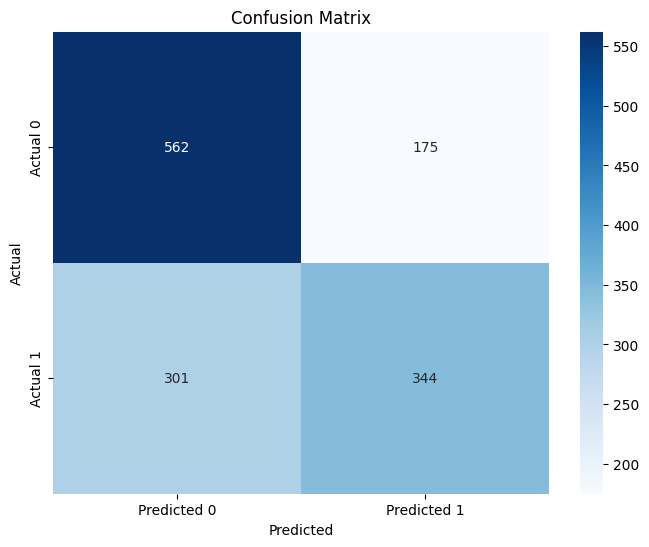

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate accuracy
accuracy_1 = accuracy_score(y_test_two_year_recid, y_pred_1)
print(f"Accuracy: {accuracy_1}")

# Generate classification report
class_report_1 = classification_report(y_test_two_year_recid, y_pred_1)
print("Classification Report:\n", class_report_1)

# Generate confusion matrix
conf_matrix_1 = confusion_matrix(y_test_two_year_recid, y_pred_1)
print("Confusion Matrix:\n", conf_matrix_1)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_1, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM for two_year_recid

In [ ]:
from sklearn.svm import SVC
model_2 = SVC(probability=True, random_state=42)
model_2.fit(X_train, y_train_two_year_recid)

SVC(probability=True, random_state=42)

In [ ]:
y_pred_2 = model_2.predict(X_test)

Accuracy: 0.6562952243125905
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.79      0.71       737
           1       0.68      0.51      0.58       645

    accuracy                           0.66      1382
   macro avg       0.66      0.65      0.64      1382
weighted avg       0.66      0.66      0.65      1382

Confusion Matrix:
 [[581 156]
 [319 326]]


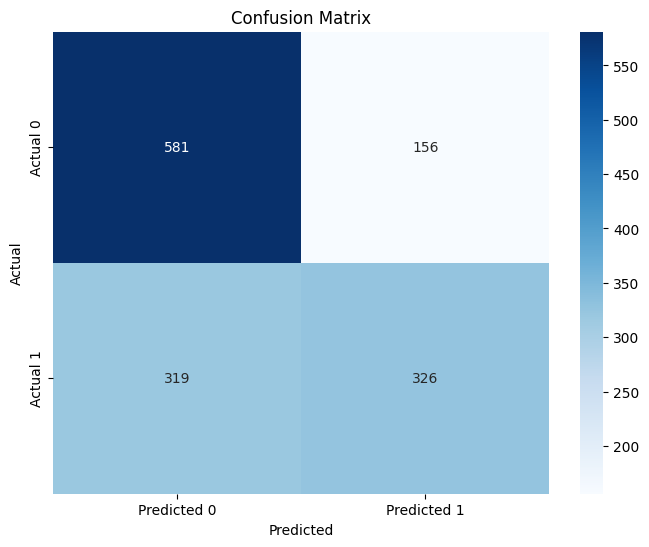

In [ ]:
# Calculate accuracy
accuracy_2 = accuracy_score(y_test_two_year_recid, y_pred_2)
print(f"Accuracy: {accuracy_2}")

# Generate classification report
class_report_2 = classification_report(y_test_two_year_recid, y_pred_2)
print("Classification Report:\n", class_report_2)

# Generate confusion matrix
conf_matrix_2 = confusion_matrix(y_test_two_year_recid, y_pred_2)
print("Confusion Matrix:\n", conf_matrix_2)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_2, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# XGBoost for is_recid

In [ ]:
y_train_is_recid = y_train['is_recid']
y_test_is_recid = y_test['is_recid']
y_train_is_recid.shape, y_test_is_recid.shape

((5525,), (1382,))

In [ ]:
model_3 = xgb.XGBClassifier(random_state=42)
model_3.fit(X_train, y_train_is_recid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_3 = model_3.predict(X_test)

Accuracy: 0.6714905933429812
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.74      0.69       688
           1       0.70      0.61      0.65       694

    accuracy                           0.67      1382
   macro avg       0.67      0.67      0.67      1382
weighted avg       0.67      0.67      0.67      1382

Confusion Matrix:
 [[508 180]
 [274 420]]


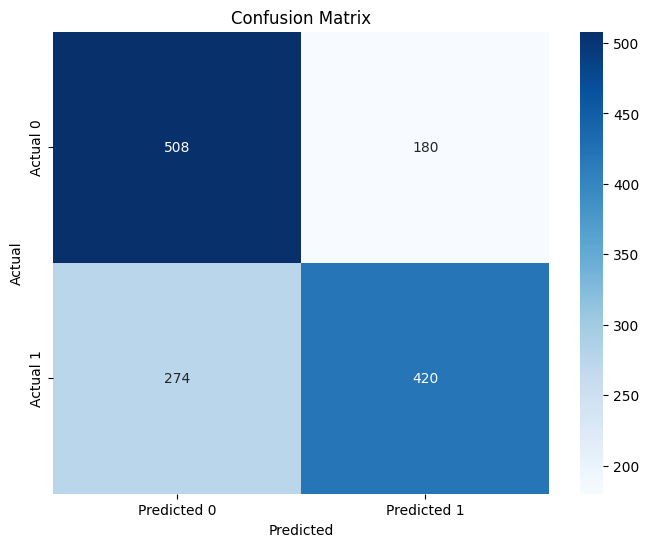

In [ ]:
# Calculate accuracy
accuracy_3 = accuracy_score(y_test_is_recid, y_pred_3)
print(f"Accuracy: {accuracy_3}")

# Generate classification report
class_report_3 = classification_report(y_test_is_recid, y_pred_3)
print("Classification Report:\n", class_report_3)

# Generate confusion matrix
conf_matrix_3 = confusion_matrix(y_test_is_recid, y_pred_3)
print("Confusion Matrix:\n", conf_matrix_3)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_3, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM for is_recid

In [ ]:
from sklearn.svm import SVC
model_4 = SVC(probability=True, random_state=42)
model_4.fit(X_train, y_train_is_recid)

SVC(probability=True, random_state=42)

In [ ]:
y_pred_4 = model_4.predict(X_test)

Accuracy: 0.6591895803183792
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.78      0.69       688
           1       0.71      0.54      0.61       694

    accuracy                           0.66      1382
   macro avg       0.67      0.66      0.65      1382
weighted avg       0.67      0.66      0.65      1382

Confusion Matrix:
 [[535 153]
 [318 376]]


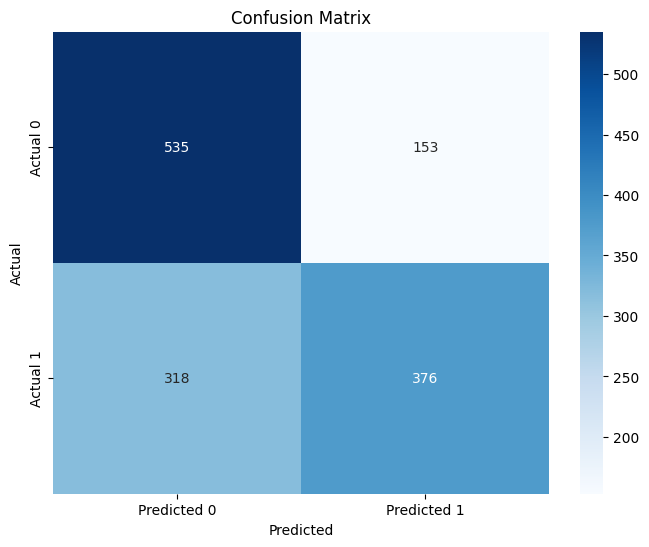

In [ ]:
# Calculate accuracy
accuracy_4 = accuracy_score(y_test_is_recid, y_pred_4)
print(f"Accuracy: {accuracy_4}")

# Generate classification report
class_report_4 = classification_report(y_test_is_recid, y_pred_4)
print("Classification Report:\n", class_report_4)

# Generate confusion matrix
conf_matrix_4 = confusion_matrix(y_test_is_recid, y_pred_4)
print("Confusion Matrix:\n", conf_matrix_4)

# You can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_4, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Inprocessing Methods

In [ ]:
!pip install aif360

In [ ]:
import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np
from aif360.algorithms.inprocessing import AdversarialDebiasing
from aif360.datasets import StandardDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Disable eager execution for TensorFlow 1.x compatibility
tf.disable_eager_execution()

# Define protected attribute(s)
protected_attribute = 'race_African-American'  # Ensure this matches column names
privileged_groups = [{protected_attribute: 1}]  # 1 is privileged
unprivileged_groups = [{protected_attribute: 0}]  # 0 is unprivileged

# Define features and target variable
target_col = "two_year_recid"
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split (stratified to maintain label balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize numerical features
numerical_cols = ['juv_fel_count', 'juv_misd_count', 'is_recid', 'is_violent_recid',
                  'total_prior_convictions', 'age_18-25', 'age_26-35', 'age_36-45', 'age_46+']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Convert back to DataFrame and retain categorical variables
X_train_fixed = pd.DataFrame(X_train_scaled, columns=numerical_cols)
X_test_fixed = pd.DataFrame(X_test_scaled, columns=numerical_cols)

categorical_cols = ['race_African-American', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
                    'race_Native American', 'race_Other', 'sex_Male', 'c_charge_degree_M']

X_train_fixed[categorical_cols] = X_train[categorical_cols].reset_index(drop=True)
X_test_fixed[categorical_cols] = X_test[categorical_cols].reset_index(drop=True)

# Convert dataset to AIF360 format
dataset_train = StandardDataset(
    pd.concat([X_train_fixed, y_train.reset_index(drop=True)], axis=1),
    label_name=target_col,
    favorable_classes=[0],
    protected_attribute_names=[protected_attribute],
    privileged_classes=[[1]]
)

dataset_test = StandardDataset(
    pd.concat([X_test_fixed, y_test.reset_index(drop=True)], axis=1),
    label_name=target_col,
    favorable_classes=[0],
    protected_attribute_names=[protected_attribute],
    privileged_classes=[[1]]
)

# Adversial Debiasing

In [ ]:
### **🔥 Apply Adversarial Debiasing as an In-Processing Method**
# Create a new session (or reset the existing one)
# ✅ RESET TensorFlow graph before creating a new session
tf.reset_default_graph()
sess = tf.Session()

with tf.variable_scope("adv_debias", reuse=tf.AUTO_REUSE): # ✅ Add variable scope with reuse=tf.AUTO_REUSE
    # Initialize and train Adversarial Debiasing model
    adv_model = AdversarialDebiasing(privileged_groups=privileged_groups,
                                     unprivileged_groups=unprivileged_groups,
                                     scope_name='adv_debias',
                                     debias=True,
                                     adversary_loss_weight=0.1,  # Reduce adversary strength
                                     num_epochs=100,             # Train longer for better fairness
                                     classifier_num_hidden_units=100,  # More robust model
                                     sess=sess)

    adv_model.fit(dataset_train)  # ✅ FIT model before predicting

# ✅ Use predict() to get transformed dataset
dataset_train_adv = adv_model.predict(dataset_train)
dataset_test_adv = adv_model.predict(dataset_test)

# Convert transformed dataset back to DataFrame
df_train_adv = dataset_train_adv.convert_to_dataframe()[0]
df_test_adv = dataset_test_adv.convert_to_dataframe()[0]

# ✅ Verify label distribution
print("\nLabel distribution in training data (After Debiasing):")
print(df_train_adv[target_col].value_counts())

print("\nLabel distribution in test data (After Debiasing):")
print(df_test_adv[target_col].value_counts())

# ✅ Save debiased datasets for further analysis
df_train_adv.to_csv("compas_train_adversarial_debiasing.csv", index=False)
df_test_adv.to_csv("compas_test_adversarial_debiasing.csv", index=False)

# ✅ Close TensorFlow session
sess.close()

epoch 0; iter: 0; batch classifier loss: 0.711597; batch adversarial loss: 0.702935
epoch 1; iter: 0; batch classifier loss: 0.485361; batch adversarial loss: 0.685159
epoch 2; iter: 0; batch classifier loss: 0.372237; batch adversarial loss: 0.699197
epoch 3; iter: 0; batch classifier loss: 0.340001; batch adversarial loss: 0.688707
epoch 4; iter: 0; batch classifier loss: 0.287950; batch adversarial loss: 0.679256
epoch 5; iter: 0; batch classifier loss: 0.304459; batch adversarial loss: 0.680498
epoch 6; iter: 0; batch classifier loss: 0.307561; batch adversarial loss: 0.681716
epoch 7; iter: 0; batch classifier loss: 0.346092; batch adversarial loss: 0.684857
epoch 8; iter: 0; batch classifier loss: 0.312616; batch adversarial loss: 0.667495
epoch 9; iter: 0; batch classifier loss: 0.264020; batch adversarial loss: 0.664348
epoch 10; iter: 0; batch classifier loss: 0.212256; batch adversarial loss: 0.679556
epoch 11; iter: 0; batch classifier loss: 0.209510; batch adversarial loss:


XGBoost Model (After Adversarial Debiasing):
  Accuracy: 0.989387361312108

Confusion Matrix (XGBoost Model):
[[1448    2]
 [  20  603]]


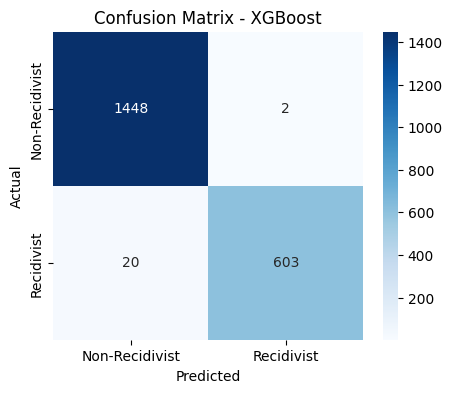

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# ✅ Load the debiased datasets
df_train_adv = pd.read_csv("compas_train_adversarial_debiasing.csv")
df_test_adv = pd.read_csv("compas_test_adversarial_debiasing.csv")

# ✅ Prepare the data for training and testing
X_train_final = df_train_adv.drop(columns=[target_col]) # Assuming 'target_col' is defined
y_train_final = df_train_adv[target_col]
X_test_final = df_test_adv.drop(columns=[target_col])
y_test_final = df_test_adv[target_col]

# Train XGBoost Model on Debiased Dataset
xgb_model = XGBClassifier(
    n_estimators=200,       # More trees, but not too many
    max_depth=4,            # Shallower trees to avoid complexity
    learning_rate=0.05,     # Slower learning rate
    min_child_weight=5,     # Prevents overly complex trees
    subsample=0.7,          # Uses 70% of data per tree
    colsample_bytree=0.8,   # Uses 80% of features per tree
    reg_lambda=1.0,         # L2 Regularization
    random_state=42
)
xgb_model.fit(X_train_final, y_train_final)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test_final)

# Evaluate Model Performance
accuracy_xgb = accuracy_score(y_test_final, y_pred_xgb)
print("\nXGBoost Model (After Adversarial Debiasing):")
print("  Accuracy:", accuracy_xgb)

# Compute Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_final, y_pred_xgb)
print("\nConfusion Matrix (XGBoost Model):")
print(conf_matrix_xgb)

# ✅ Function to Plot Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=["Non-Recidivist", "Recidivist"],
                yticklabels=["Non-Recidivist", "Recidivist"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# ✅ Plot Confusion Matrix for XGBoost
plot_confusion_matrix(conf_matrix_xgb, "XGBoost")

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Train SVM on the debiased dataset
svm_model = SVC(
    kernel='linear',  # Simpler kernel to avoid overfitting
    C=0.1,            # Higher regularization
    gamma='scale',     # Keeps gamma at default for normalization
    random_state=42
)
svm_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred_svm = svm_model.predict(X_test_final)

# Evaluate model performance
accuracy_svm = accuracy_score(y_test_final, y_pred_svm)
print("\nSVM Model (After Adversarial Debiasing):")
print("  Accuracy:", accuracy_svm)

# Compute Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test_final, y_pred_svm)
print("\nConfusion Matrix (SVM Model):")
print(conf_matrix_svm)


SVM Model (After Adversarial Debiasing):
  Accuracy: 0.989387361312108

Confusion Matrix (SVM Model):
[[1450    0]
 [  22  601]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Train GBDT on the debiased dataset
gbdt_model = GradientBoostingClassifier(
    n_estimators=200,        # More trees with slower learning
    learning_rate=0.05,      # Lower learning rate
    max_depth=3,             # Shallower trees
    min_samples_split=10,    # Require more samples to split
    subsample=0.7,           # Uses 70% of data per tree
    random_state=42
)
gbdt_model.fit(X_train_final, y_train_final)

# Make predictions
y_pred_gbdt = gbdt_model.predict(X_test_final)

# Evaluate model performance
accuracy_gbdt = accuracy_score(y_test_final, y_pred_gbdt)
print("\nGBDT Model (After Adversarial Debiasing):")
print("  Accuracy:", accuracy_gbdt)

# Compute Confusion Matrix
conf_matrix_gbdt = confusion_matrix(y_test_final, y_pred_gbdt)
print("\nConfusion Matrix (GBDT Model):")
print(conf_matrix_gbdt)


GBDT Model (After Adversarial Debiasing):
  Accuracy: 0.9898697539797395

Confusion Matrix (GBDT Model):
[[1445    5]
 [  16  607]]
